#### Testdaten erzeugen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from IPython.display import clear_output, display
#from ipywidgets import interact
from time import sleep

In [3]:
def compute_cost(intercept, coef, x, y):
    total_cost = 0
    N = len(x)
    for i in range(N):
        total_cost += (y[i] - (coef * x[i] + intercept)) ** 2
    return total_cost / N

In [4]:
def step_gradient(intercept_current, coef_current, x, y, learning_rate):
    coef_gradient = 0
    intercept_gradient = 0
    N = len(x)
    for i in range(N):
        coef_gradient += - (2/N) * x[i] * (y[i] - (coef_current * x[i] + intercept_current))
        intercept_gradient += - (2/N) * (y[i] - (coef_current * x[i] + intercept_current))
    coef_updated = coef_current - learning_rate * coef_gradient
    intercept_updated = intercept_current - learning_rate * intercept_gradient
    return intercept_updated, coef_updated

In [10]:
def plot_results(x, y, cost_graph, path_intercept, path_coef, pause_time=0.1):
    # Initialisiere Plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    ax1, ax2, ax3 = axes

    # Achsen für die Visualisierung vorbereiten
    ax1.scatter(x, y, color='blue')
    ax1.set_title("Datenpunkte und Regressionsgerade")
    ax2.set_title("Kostenverlauf")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Kosten")
    ax3.set_title("Parameter")
    ax3.set_xlabel("Iteration")
    ax3.set_ylabel("Wert")

    # Iteriere durch gespeicherte Werte und aktualisiere den Plot
    for i in range(len(cost_graph)):
        # Erhalte aktuelle Werte
        intercept = path_intercept[i]
        coef = path_coef[i]
        cost = cost_graph[i]

        # Erhalte aktuelle Achsengrenzen
        x_min, x_max = ax1.get_xlim()
        line_x = np.linspace(x_min, x_max, 100)
        line_y = coef * line_x + intercept

        # Linie zeichnen oder aktualisieren
        if i == 0:
            ax1.plot(line_x, line_y, color='red', label="Regressionsgerade")
        else:
            ax1.lines[-1].set_xdata(line_x)
            ax1.lines[-1].set_ydata(line_y)

        # Update Kostenverlauf
        ax2.clear()
        ax2.plot(cost_graph[:i + 1], color='green', label=f"Kosten: {cost}")
        ax2.set_title('Kostenverlauf')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Kosten')
        ax2.legend()

        # Update Parameterverlauf
        ax3.clear()
        ax3.plot(path_intercept[:i + 1], label=f"Intercept: {intercept}", linestyle="--")
        ax3.plot(path_coef[:i + 1], label=f"Steigung: {coef}", linestyle="-")
        ax3.set_title("Parameter")
        ax3.set_xlabel("Iteration")
        ax3.set_ylabel("Wert")
        ax3.legend()

        # Anzeige aktualisieren
        clear_output(wait=True)
        display(fig)
        plt.pause(pause_time)

    plt.close(fig)

In [11]:
def gradient_descent_runner(x, y, starting_intercept, starting_coef, learning_rate, num_iterations, pause_time=0.1):
    intercept = starting_intercept
    coef = starting_coef
    cost_graph = []
    path_intercept = []
    path_coef = []

    # Berechnungsschleife
    for i in range(num_iterations):
        # Berechnung des Fehlers
        cost = compute_cost(intercept, coef, x, y)
        cost_graph.append(cost)

        # Speichere die aktuellen Parameter
        path_intercept.append(intercept)
        path_coef.append(coef)

        # Aktualisiere Parameter
        intercept, coef = step_gradient(intercept, coef, x, y, learning_rate)

    # Zeichne Ergebnisse nach der Berechnung
    plot_results(x, y, cost_graph, path_intercept, path_coef, pause_time)

    return intercept, coef, cost_graph

In [12]:
#Testdaten
np.random.seed(42)
anzahl_testdaten = 100
x = np.random.uniform(0, 10, size=anzahl_testdaten)
y = 2.5 * x + np.random.normal(0, 4, size=anzahl_testdaten)  # Lineare Beziehung mit Rauschen
x.shape # Form passt nicht weil wir zweidimensionale Array brauchen
X = x.reshape(-1, 1)
X


array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [13]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [14]:
X.shape, y.shape

((100, 1), (100,))

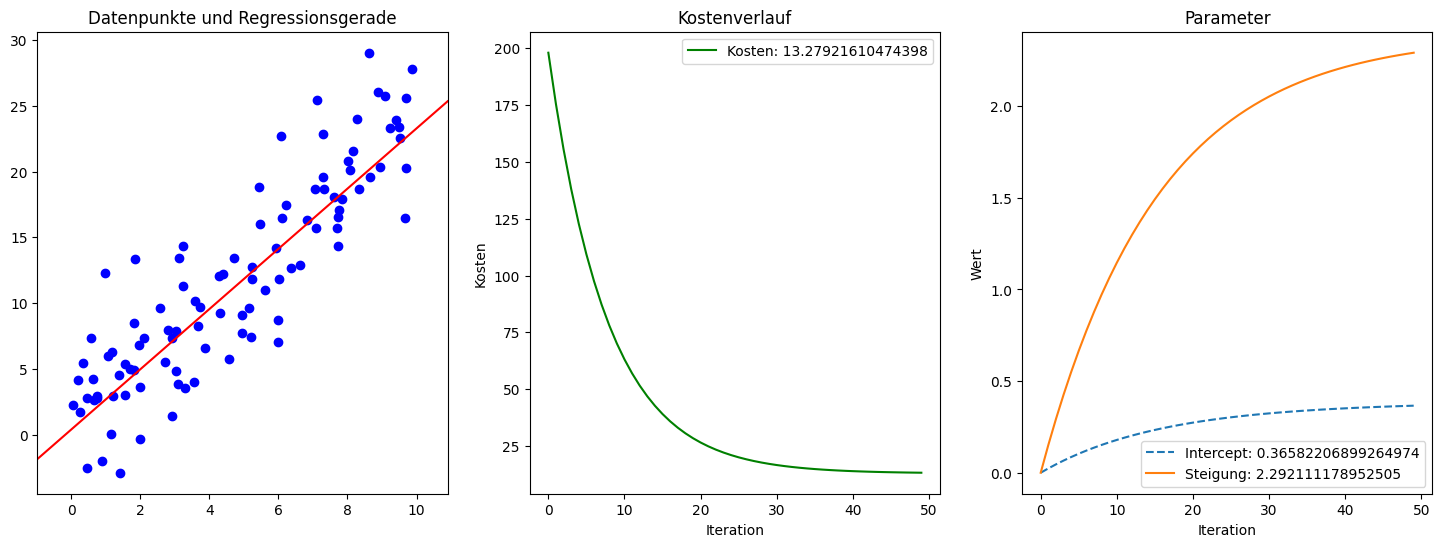

Finale Werte: Intercept = 0.3670366883817282, Coefficient = 2.2982422784939724


In [17]:
learning_rate = 0.001
initial_intercept = 0
initial_coef = 0
num_iterations = 50

intercept, coef, cost_graph = gradient_descent_runner(x, y, initial_intercept, initial_coef, learning_rate, num_iterations, pause_time=0.2)

print(f"Finale Werte: Intercept = {intercept}, Coefficient = {coef}")

#### Aufgabe
1. Erstellt mit Hilfe von `sklearn` ein lineares Regressionsmodell.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y, 
                                                     test_size=0.3) # 25 % Daten


In [19]:
model=LinearRegression()


2. Trainiert das Modell mit Hilfe der Testdaten (kein train test split notwendig für diese Aufgabe). Falls ihr einen Fehler bekommt schaut euch die Meldung an, ihr müsst eure Eingabedaten entsprechend aufbereiten. Seht euch die Daten davor und danach an und versucht
 zu erkennen, was sich verändert.

In [20]:
model.fit(X_train, y_train)


LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
model.score(X_train, y_train) 

0.791461869558377

In [23]:
model.score(X_test, y_test) 

0.7484755278238098

In [27]:
intercept_m= model.intercept_
intercept_m

np.float64(0.321351139918324)

In [28]:
koef = model.coef_
koef

array([2.32818693])

In [ ]:
#Finale Werte:     Intercept = 0.3670366883817282, Coefficient = 2.2982422784939724
# Wir berechten: intercept_m = 0.321351139918324,         koef = 2.32818693


3. Berechnet mit diesen Paramtern und mit Hilfe der Funktion `compute_cost()` die Kosten (den Fehler). Dies soll euch einen Vergleichswert liefern, welche Kosten entstehen bei der optimierten Berechnung durch skitlearn im Vergleich zu unserer Lösung.

In [91]:
'''from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compute_cost(y_true, y_pred):
    """
    Berechnet verschiedene Fehlermaße für Vorhersagen.
    
    Parameter:
    y_true: array-like, echte Zielwerte
    y_pred: array-like, vorhergesagte Werte
    
    Rückgabewerte:
    Ein Dictionary mit den berechneten Metriken:
        - MAE: Mean Absolute Error
        - MSE: Mean Squared Error
        - RMSE: Root Mean Squared Error
        - RSS: Residual Sum of Squares
        - R2: R-Squared (Erklärte Varianz)
    """
    # Fehlermaße berechnen
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)
    
    # Ergebnisse als Dictionary zurückgeben
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "RSS": rss,
        "R2": r2
    }'''


In [103]:
'''df=pd.DataFrame([compute_cost(y_test, y_pred)])
df
'''

,MAE,MSE,RMSE,RSS,R2
0,3.262928,17.393562,4.170559,521.806872,0.748476


In [29]:
def compute_cost(intercept, coef, x, y):
    total_cost = 0
    N = len(x)
    for i in range(N):
        total_cost += (y[i] - (coef * x[i] + intercept)) ** 2
    return total_cost / N

print(compute_cost(intercept_m, koef, X,y))


[13.13911267]


4. Versucht eine optimale Lernrate `learning_rate` einzustellen um möglichst schnell an die (gerade eben) berechneten Kosten heran zu kommen.

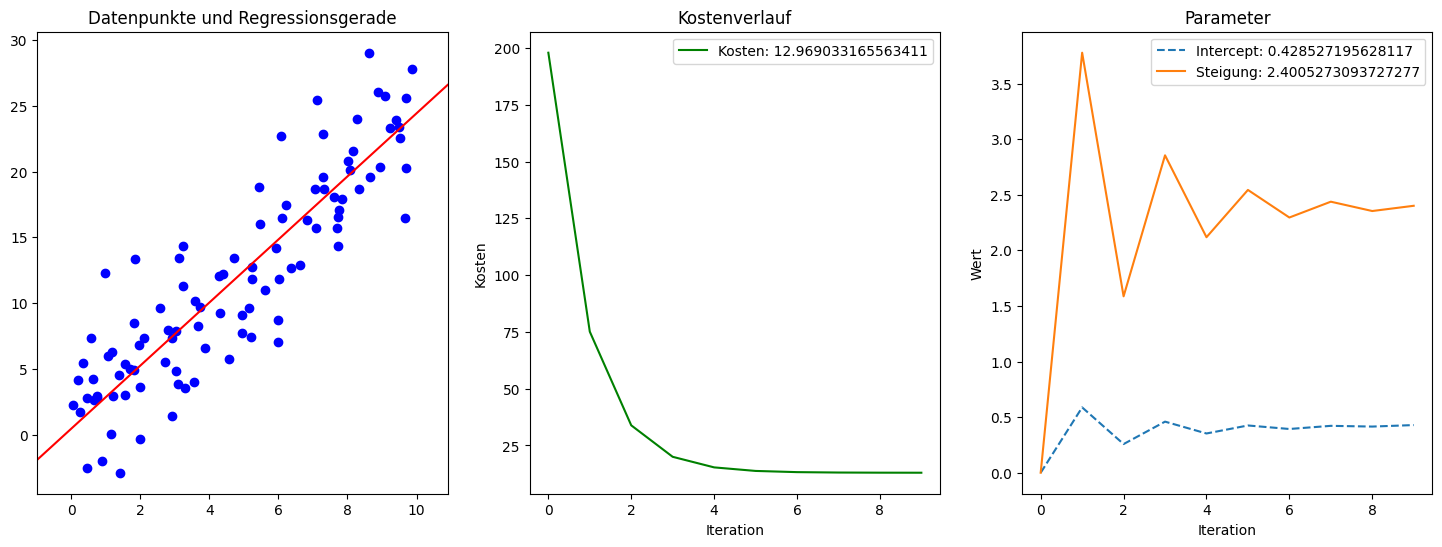

Finale Werte: Intercept = 0.43026983562572046, Coefficient = 2.371731324463196


In [41]:
learning_rate = 0.025
initial_intercept = 0
initial_coef = 0
num_iterations = 10
intercept, coef, cost_graph = gradient_descent_runner(x, y, initial_intercept, initial_coef, learning_rate, num_iterations, pause_time=0.2)

print(f"Finale Werte: Intercept = {intercept}, Coefficient = {coef}")

In [42]:
cost_graph

[np.float64(197.97156490075847),
 np.float64(75.11052796884968),
 np.float64(33.84192154523335),
 np.float64(19.97916701377156),
 np.float64(15.32170814650642),
 np.float64(13.756217859698067),
 np.float64(13.229309548363698),
 np.float64(13.051276958352744),
 np.float64(12.990456058223337),
 np.float64(12.969033165563411)]

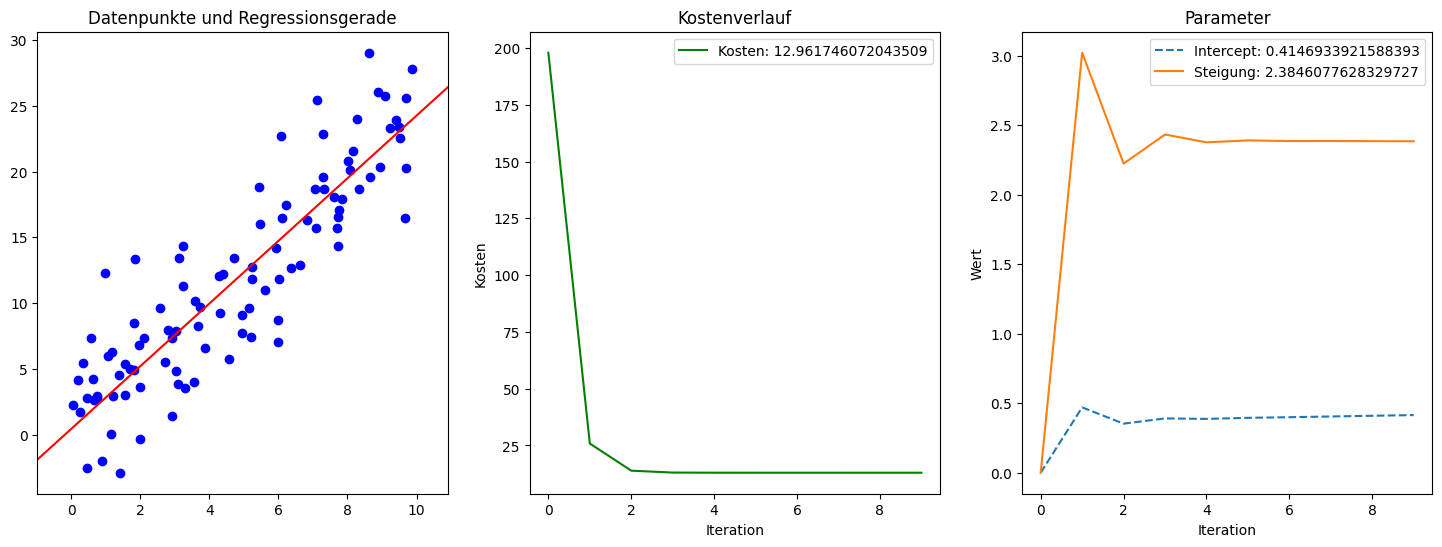

Finale Werte: Intercept = 0.4196348819862156, Coefficient = 2.383829223460765


In [43]:
learning_rate = 0.02 #es ist besser
initial_intercept = 0
initial_coef = 0
num_iterations = 10
intercept, coef, cost_graph = gradient_descent_runner(x, y, initial_intercept, initial_coef, learning_rate, num_iterations, pause_time=0.2)

print(f"Finale Werte: Intercept = {intercept}, Coefficient = {coef}")

In [44]:
cost_graph

[np.float64(197.97156490075847),
 np.float64(25.83177320011871),
 np.float64(13.865097382774676),
 np.float64(13.0319524731446),
 np.float64(12.97271987475721),
 np.float64(12.967310434439739),
 np.float64(12.965670709180381),
 np.float64(12.964320896581855),
 np.float64(12.96301850325376),
 np.float64(12.961746072043509)]

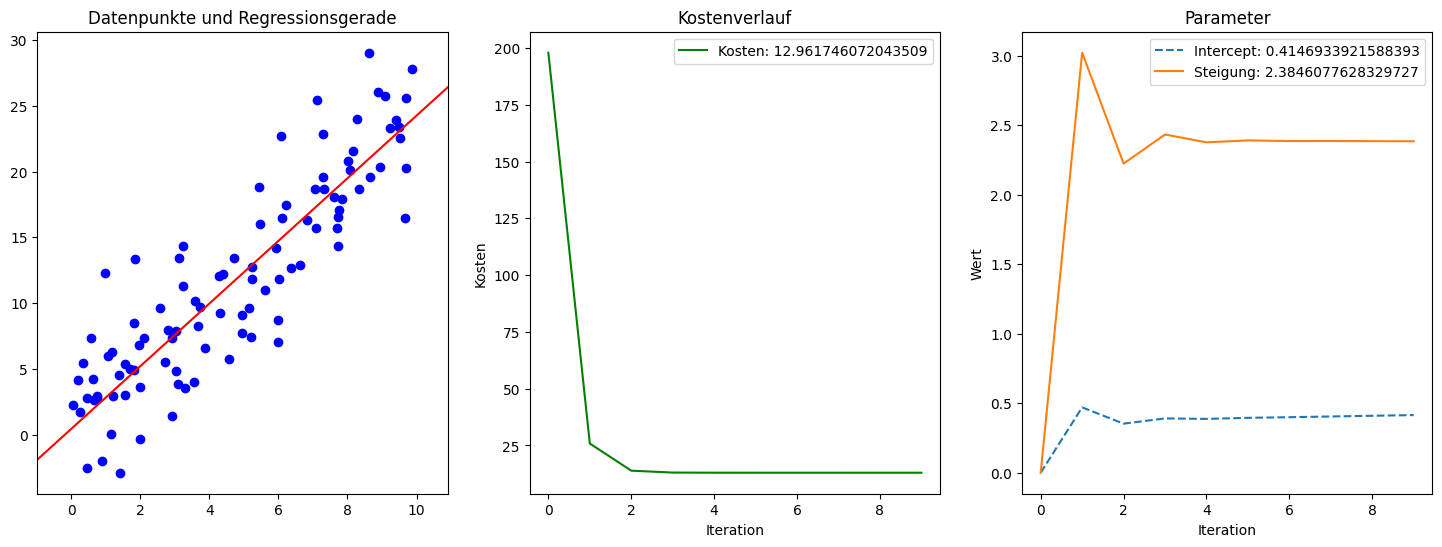

Finale Werte: Intercept = 0.4196348819862156, Coefficient = 2.383829223460765


In [ ]:
learning_rate = 0.02 #es ist besser
initial_intercept = 0
initial_coef = 0
num_iterations = 10
intercept, coef, cost_graph = gradient_descent_runner(x, y, initial_intercept, initial_coef, learning_rate, num_iterations, pause_time=0.2)

print(f"Finale Werte: Intercept = {intercept}, Coefficient = {coef}")


5. _Zusatzaufgabe_: Überlegt euch eine Abbruchbedingung und baut diese in den Code ein. Das Verfahren soll beendet werden wenn sich keine aussreichend große Kostenminimierung mehr ergibt (ab wann das der Fall ist bleibt euch überlassen).

In [ ]:
#bearbeiten
def gradient_descent_runner_with_early_stop(X, y, weights, bias, learning_rate, tolerance=1e-6):
    m = len(y)
    cost_history = []
    prev_cost = float('inf')
    i=0
    
    while True:
        predictions = X.dot(weights) + bias
        error = predictions - y
        i +=1
        
        #Gradienten berechnen
        dw = (1 / m) * X.T.dot(error)
        db = (1 / m) * np.sum(error)
        
        # Gewichte und Bias aktualisieren
        weights -= learning_rate * dw
        bias -= learning_rate *db
        
        # Kosten berechnen
        cost ?
        cost ?
        
        #Abruchsbedigung
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost
    
    return weights, bias, cost_history, i

#Gradientenabstieg mit Abbruchbedingung
optimal_weights, optimal_bias, cost_history, i = gradient_descent_runner_with_early_stop(X,y,weights, bias, learning_rate)

print(f' Optimale Kosten: {cost_history[-2]}, {cost_history[-1]}, iteration: {i}')       
        

In [45]:
import numpy as np

def gradient_descent_runner_with_early_stop(X, y, weights, bias, learning_rate, tolerance=1e-6):
    m = len(y)
    cost_history = []
    prev_cost = float('inf')
    i = 0

    while True:
        # Vorhersagen berechnen
        predictions = X.dot(weights) + bias
        error = predictions - y
        
        # Gradienten berechnen
        dw = (1 / m) * X.T.dot(error)
        db = (1 / m) * np.sum(error)

        # Gewichte und Bias aktualisieren
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Kosten berechnen (MSE)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Abbruchbedingung
        if abs(prev_cost - cost) < tolerance:
            break

        prev_cost = cost
        i += 1

    return weights, bias, cost_history, i

# Beispiel: Gradient Descent mit Abbruchbedingung
data_size = 100
np.random.seed(42)
X = np.random.rand(data_size, 1)  # Beispiel-Daten
true_weights = np.array([2.0])
true_bias = 5.0
y = X.dot(true_weights) + true_bias + np.random.randn(data_size, 1) * 0.1

weights = np.random.rand(1)  # Zufällige Initialisierung
bias = 0.0
learning_rate = 0.1
tolerance = 1e-6

optimal_weights, optimal_bias, cost_history, i = gradient_descent_runner_with_early_stop(
    X, y, weights, bias, learning_rate, tolerance
)

print(f'Optimale Kosten: {cost_history[-2]}, {cost_history[-1]}, Iteration: {i}')
print(f'Optimale Gewichte: {optimal_weights}, Optimaler Bias: {optimal_bias}')


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,100)